## Libraries needed

In [1]:
#pandas for data manipulation and analysis
import pandas as pd
#numpy for calculations
import numpy as np
from numpy import where
#collections for storage of data
import collections
from collections import Counter
#sklearn for statistical modelling
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#from sklearn.metrics import silhouette_score
#matplotlib and seaborn for visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import re

### In this notebook

We will load, clean, and select all the groups of files that we have collected about household information for the USA from 2015 to 2020. We will be manipulation 3 datasets, one from 2015, another one from 2017 and the third one from 2020.

## 1. Loading the data

In [2]:
ush15=pd.read_csv('/Users/mac/Desktop/TFG/data/tables/US/household/2015/ahs2015n.csv')
ush17=pd.read_csv('/Users/mac/Desktop/TFG/data/tables/US/household/2017/ahs2017n.csv')
ush20=pd.read_csv('/Users/mac/Desktop/TFG/data/tables/US/household/2020/ahs2020n.csv' ,sep=",")

We will only be using the following variables:
    
JBLD: Type of housing unit

JGARAGE: Flag indicating unit has a garage or carport 

JPORCH: Flag indicating unit has porch or deck or balcony or patio

JBATHEXCLU: Flag indicating if the unit's bathroom facilities are for the exclusive use of the household

JBATHROOMS: Number of bathrooms in unit

JBEDROOMS: Number of bedrooms in unit

JDINING: Number of dining rooms in unit

JKITCHENS: Number of kitchens in unit

JKITEXCLU: Flag indicating if the unit's kitchen facilities are for the exclusive use of the household

JTOTROOMS: Number of total rooms in unit

JUNITFLOORS: Number of floors within the unit

JUNITSIZE: Unit size (square feet) 

JADEQUACY: Type of housing adequacy 

JUPKEEP: Type of upkeep problems

JHSHLDTYPE: Type of household

JHHGRAD: Educational level of householder

JHHRACE: Race of householder

JFINCP: Family income (past 12 months) 

JHINCP: Household income (past 12 months)

JPERPOVLVL: Household income as percent of poverty threshold (rounded)

JNEARABAND: Number of buildings that are abandoned or vandalized within 1/2 block of this housing unit

JNEARBARCL: Number of buildings with bars on windows within 1/2 block of this housing unit

JNEARTRASH: Frequency of trash, litter, or junk in streets, lots, or properties within 1/2 block of this housing unit

JRATINGHS: Rating of unit as a place to live

JRATINGNH: Rating of neighborhood as place to live
  

In [10]:
#Select the variables which are relevant for the study
var15=ush15[['JBLD','JGARAGE','JPORCH','JBATHEXCLU','JBATHROOMS','JBEDROOMS','JDINING','JKITCHENS','JKITEXCLU','JTOTROOMS','JUNITFLOORS','JUNITSIZE','JADEQUACY','JUPKEEP','JHSHLDTYPE','JHHGRAD','JHHRACE','JFINCP','JHINCP','JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH']]
var17=ush17[['JBLD','JGARAGE','JPORCH','JBATHEXCLU','JBATHROOMS','JBEDROOMS','JDINING','JKITCHENS','JKITEXCLU','JTOTROOMS','JUNITFLOORS','JUNITSIZE','JADEQUACY','JUPKEEP','JHSHLDTYPE','JHHGRAD','JHHRACE','JFINCP','JHINCP','JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH']]
var20=ush20[['JBLD','JGARAGE','JPORCH','JBATHEXCLU','JBATHROOMS','JBEDROOMS','JDINING','JKITCHENS','JKITEXCLU','JTOTROOMS','JUNITFLOORS','JUNITSIZE','JADEQUACY','JUPKEEP','JHSHLDTYPE','JHHGRAD','JHHRACE','JFINCP','JHINCP','JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH']]

## 2. Cleaning of datasets
Now that we have selected the relevant variables for the study, lets clean our data

In [11]:
#Removing strings to keep just the numerical data
var15 = var15.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))
var17 = var17.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))
var20 = var20.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))


/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_38705/4038415155.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  var15 = var15.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))
/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_38705/4038415155.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  var17 = var17.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))
/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_38705/4038415155.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  var20 = var20.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))


In [12]:
#Checking for no valuable data
var15.describe()

,JBLD,JGARAGE,JPORCH,JBATHEXCLU,JBATHROOMS,JBEDROOMS,JDINING,JKITCHENS,JKITEXCLU,JTOTROOMS,...,JHHGRAD,JHHRACE,JFINCP,JHINCP,JPERPOVLVL,JNEARABAND,JNEARBARCL,JNEARTRASH,JRATINGHS,JRATINGNH
count,69493.000000,69493.0,69493.000000,69493.0,69493.000000,69493.000000,69493.000000,69493.000000,69493.000000,69493.000000,...,69493.000000,69493.000000,69493.000000,69493.000000,69493.0,69493.0,69493.0,69493.0,69493.0,69493.0
mean,0.061906,0.0,0.006231,0.0,0.041573,0.028032,0.038709,0.023398,0.008648,0.497978,...,0.085908,0.135006,0.366353,1.241607,0.0,0.0,0.0,0.0,0.0,0.0
std,0.345217,0.0,0.078690,0.0,0.325902,0.235113,0.275537,0.215056,0.092594,0.600837,...,0.405510,0.485550,0.800927,0.902259,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,3.000000,0.0,1.000000,0.0,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,...,2.000000,2.000000,3.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#Checking and dropping columns with no valuable data- only 0s
var15[['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH','JGARAGE','JBATHEXCLU']].value_counts()
var17[['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH','JGARAGE','JBATHEXCLU']].value_counts()
var20[['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH','JGARAGE','JBATHEXCLU']].value_counts()

#Drop them
var15.drop(['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH','JGARAGE','JBATHEXCLU'], axis=1, inplace=True)
var17.drop(['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH','JGARAGE','JBATHEXCLU'], axis=1, inplace=True)
var20.drop(['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH','JGARAGE','JBATHEXCLU'], axis=1, inplace=True)

In [14]:
#Check for null values
var15_null = var15.isnull().sum()
var17_null = var17.isnull().sum()
var20_null = var20.isnull().sum()
print(pd.concat([var15_null, var17_null, var20_null], axis=1, keys=['var15', 'var17', 'var20']))

             var15  var17  var20
JBLD             0      0      0
JPORCH           0      0      0
JBATHROOMS       0      0      0
JBEDROOMS        0      0      0
JDINING          0      0      0
JKITCHENS        0      0      0
JKITEXCLU        0      0      0
JTOTROOMS        0      0      0
JUNITFLOORS      0      0      0
JUNITSIZE        0      0      0
JADEQUACY        0      0      0
JUPKEEP          0      0      0
JHSHLDTYPE       0      0      0
JHHGRAD          0      0      0
JHHRACE          0      0      0
JFINCP           0      0      0
JHINCP           0      0      0


In [15]:
#Check variable data types for later manipulation
var15.dtypes

JBLD           int64
JPORCH         int64
JBATHROOMS     int64
JBEDROOMS      int64
JDINING        int64
JKITCHENS      int64
JKITEXCLU      int64
JTOTROOMS      int64
JUNITFLOORS    int64
JUNITSIZE      int64
JADEQUACY      int64
JUPKEEP        int64
JHSHLDTYPE     int64
JHHGRAD        int64
JHHRACE        int64
JFINCP         int64
JHINCP         int64
dtype: object

## 3.Data Exploration
We will now explore the correlation of our data per year, dropping those variables with a correlation >0.85

                 JBLD    JPORCH  JBATHROOMS  JBEDROOMS   JDINING  JKITCHENS  \
JBLD         1.000000  0.052546    0.026624   0.025780  0.022613   0.030498   
JPORCH       0.052546  1.000000    0.406814   0.395016  0.401692   0.425059   
JBATHROOMS   0.026624  0.406814    1.000000   0.868965  0.763459   0.819299   
JBEDROOMS    0.025780  0.395016    0.868965   1.000000  0.750045   0.797570   
JDINING      0.022613  0.401692    0.763459   0.750045  1.000000   0.770568   
JKITCHENS    0.030498  0.425059    0.819299   0.797570  0.770568   1.000000   
JKITEXCLU    0.370409  0.122953    0.156895   0.147505  0.139166   0.147376   
JTOTROOMS   -0.078903  0.230820    0.453304   0.472043  0.547819   0.438818   
JUNITFLOORS  0.001966  0.302251    0.312909   0.298968  0.286019   0.330555   
JUNITSIZE   -0.000680  0.047907   -0.000484  -0.000452 -0.000533  -0.000413   
JADEQUACY   -0.128707 -0.029051   -0.045738  -0.030250 -0.035911  -0.031952   
JUPKEEP      0.014630  0.303558    0.485535   0.4642

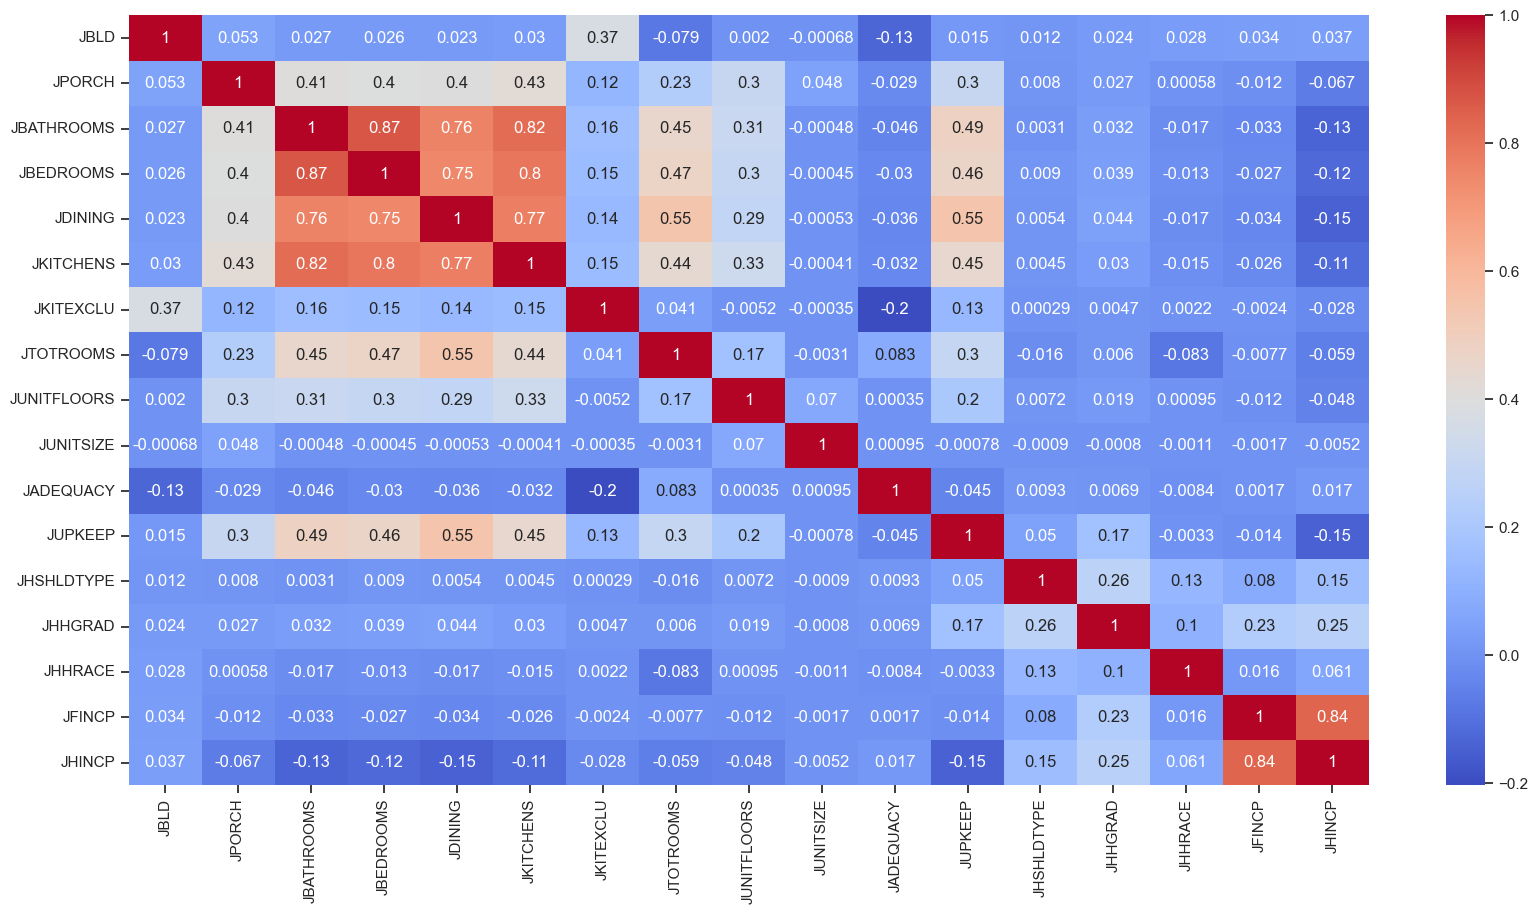

In [16]:
#2015
print(var15.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(var15.corr(), annot=True, cmap='coolwarm')
plt.show()

In [19]:
#Drop JBATHROOMS
var15.drop('JBATHROOMS', axis=1, inplace=True)

                 JBLD    JPORCH  JBATHROOMS  JBEDROOMS   JDINING  JKITCHENS  \
JBLD         1.000000  0.030212    0.015610   0.011996  0.009742   0.011904   
JPORCH       0.030212  1.000000    0.310281   0.427169  0.420593   0.452402   
JBATHROOMS   0.015610  0.310281    1.000000   0.601727  0.565334   0.572109   
JBEDROOMS    0.011996  0.427169    0.601727   1.000000  0.760119   0.858881   
JDINING      0.009742  0.420593    0.565334   0.760119  1.000000   0.779830   
JKITCHENS    0.011904  0.452402    0.572109   0.858881  0.779830   1.000000   
JKITEXCLU    0.270260  0.129911    0.107382   0.129497  0.131356   0.137380   
JTOTROOMS   -0.089306  0.228612    0.265449   0.451224  0.526710   0.425647   
JUNITFLOORS  0.074742  0.326548    0.223594   0.292853  0.267355   0.302805   
JUNITSIZE    0.002056  0.011564    0.076420   0.111656  0.093967   0.120177   
JADEQUACY   -0.132731 -0.012036   -0.385657   0.009176 -0.019738   0.003779   
JUPKEEP      0.009522  0.307209    0.453907   0.4724

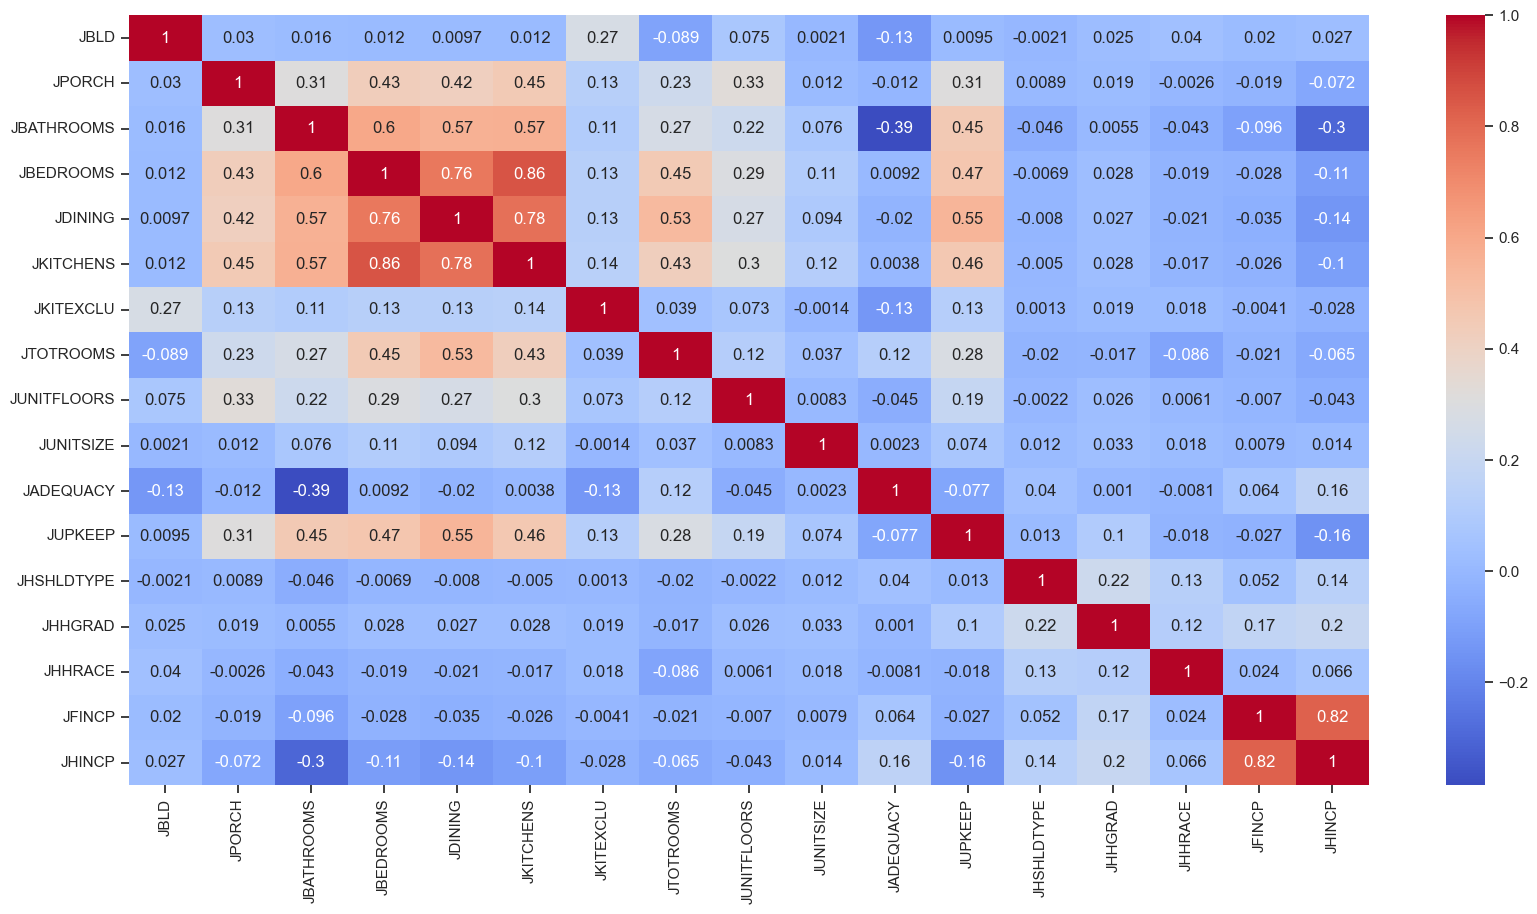

In [17]:
#2017
print(var17.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(var17.corr(), annot=True, cmap='coolwarm')
plt.show()

In [21]:
# Drop JKITCHENS
var17.drop('JKITCHENS', axis=1, inplace=True)

                 JBLD    JPORCH  JBATHROOMS  JBEDROOMS   JDINING  JKITCHENS  \
JBLD         1.000000  0.063563    0.054639   0.056237  0.046304   0.055814   
JPORCH       0.063563  1.000000    0.469496   0.442567  0.433705   0.463417   
JBATHROOMS   0.054639  0.469496    1.000000   0.899247  0.824699   0.865407   
JBEDROOMS    0.056237  0.442567    0.899247   1.000000  0.784589   0.871467   
JDINING      0.046304  0.433705    0.824699   0.784589  1.000000   0.797861   
JKITCHENS    0.055814  0.463417    0.865407   0.871467  0.797861   1.000000   
JKITEXCLU    0.103540  0.237760    0.293416   0.284518  0.276032   0.287234   
JTOTROOMS   -0.042029  0.248885    0.483807   0.481379  0.546530   0.455992   
JUNITFLOORS  0.102488  0.347159    0.377521   0.367504  0.340943   0.380475   
JUNITSIZE    0.008162  0.007861    0.004581   0.004591  0.003307   0.005233   
JADEQUACY   -0.090914 -0.022858   -0.025465  -0.016075 -0.020453  -0.022070   
JUPKEEP      0.041920  0.329823    0.541458   0.5018

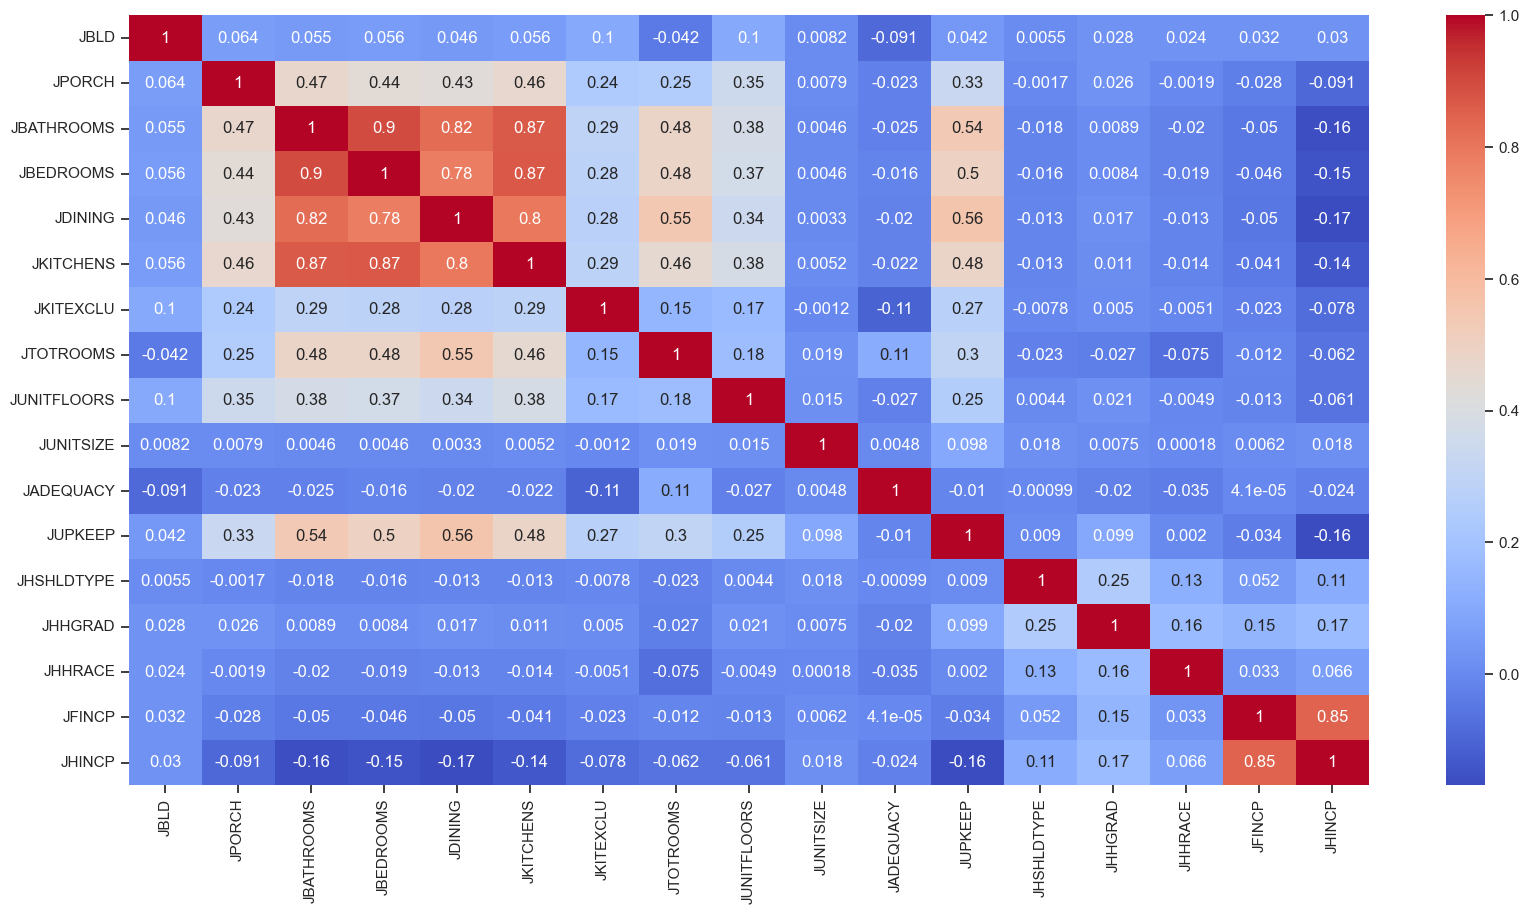

In [18]:
#2020
print(var20.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(var20.corr(), annot=True, cmap='coolwarm')
plt.show()

In [22]:
# Drop JKITCHENS, JBATHROOMS and JFINCP
var20.drop(['JKITCHENS','JBATHROOMS','JFINCP'], axis=1, inplace=True)

Now we will look for outliers in our 3 datasets and eliminate them

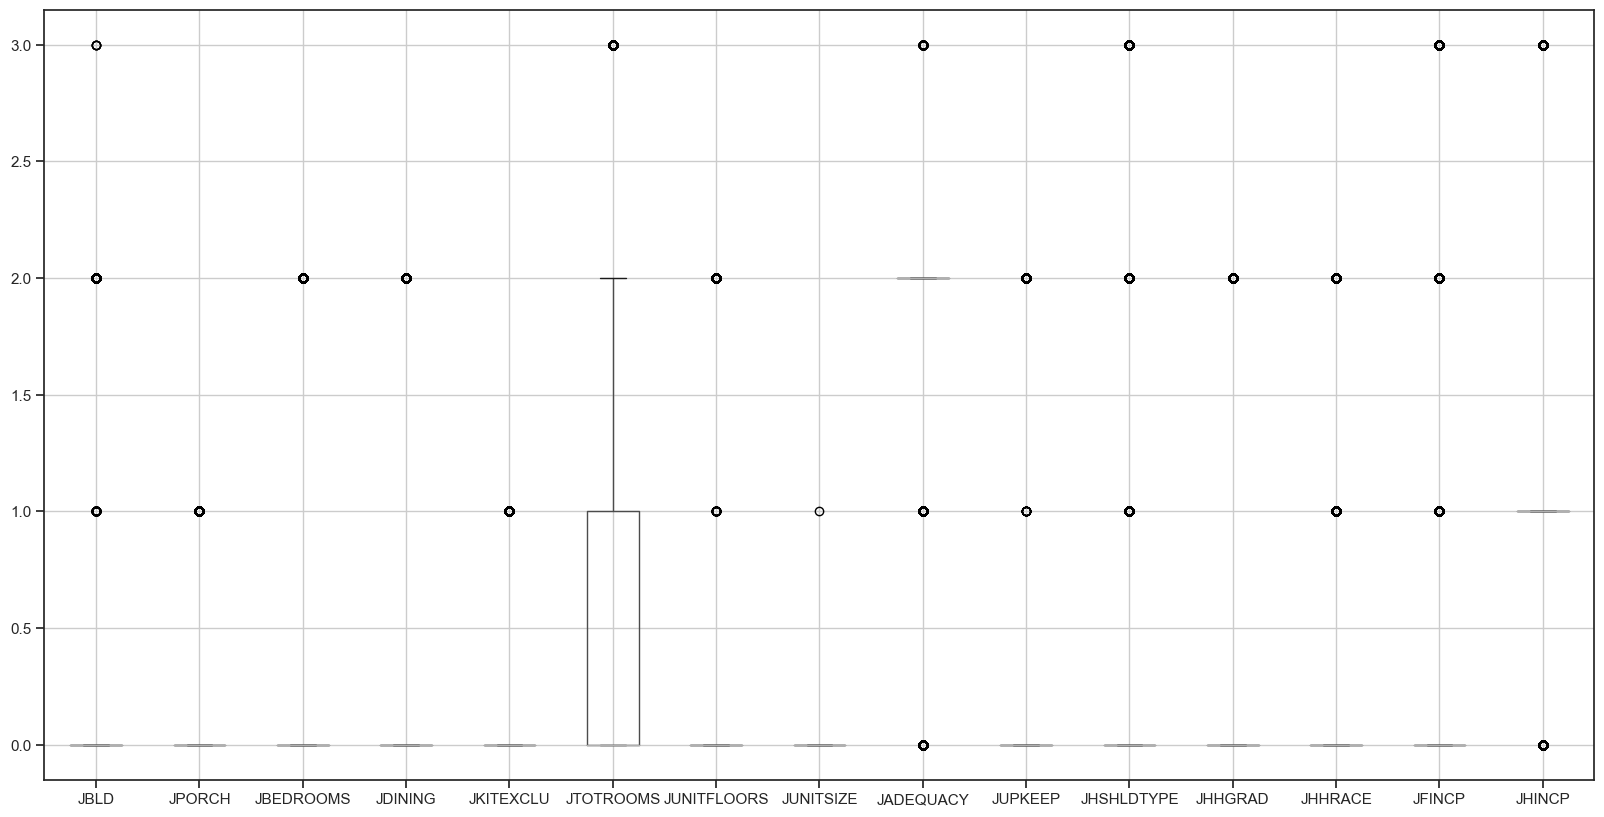

In [28]:
#2015
var15.boxplot(figsize=(20,10))
plt.show()

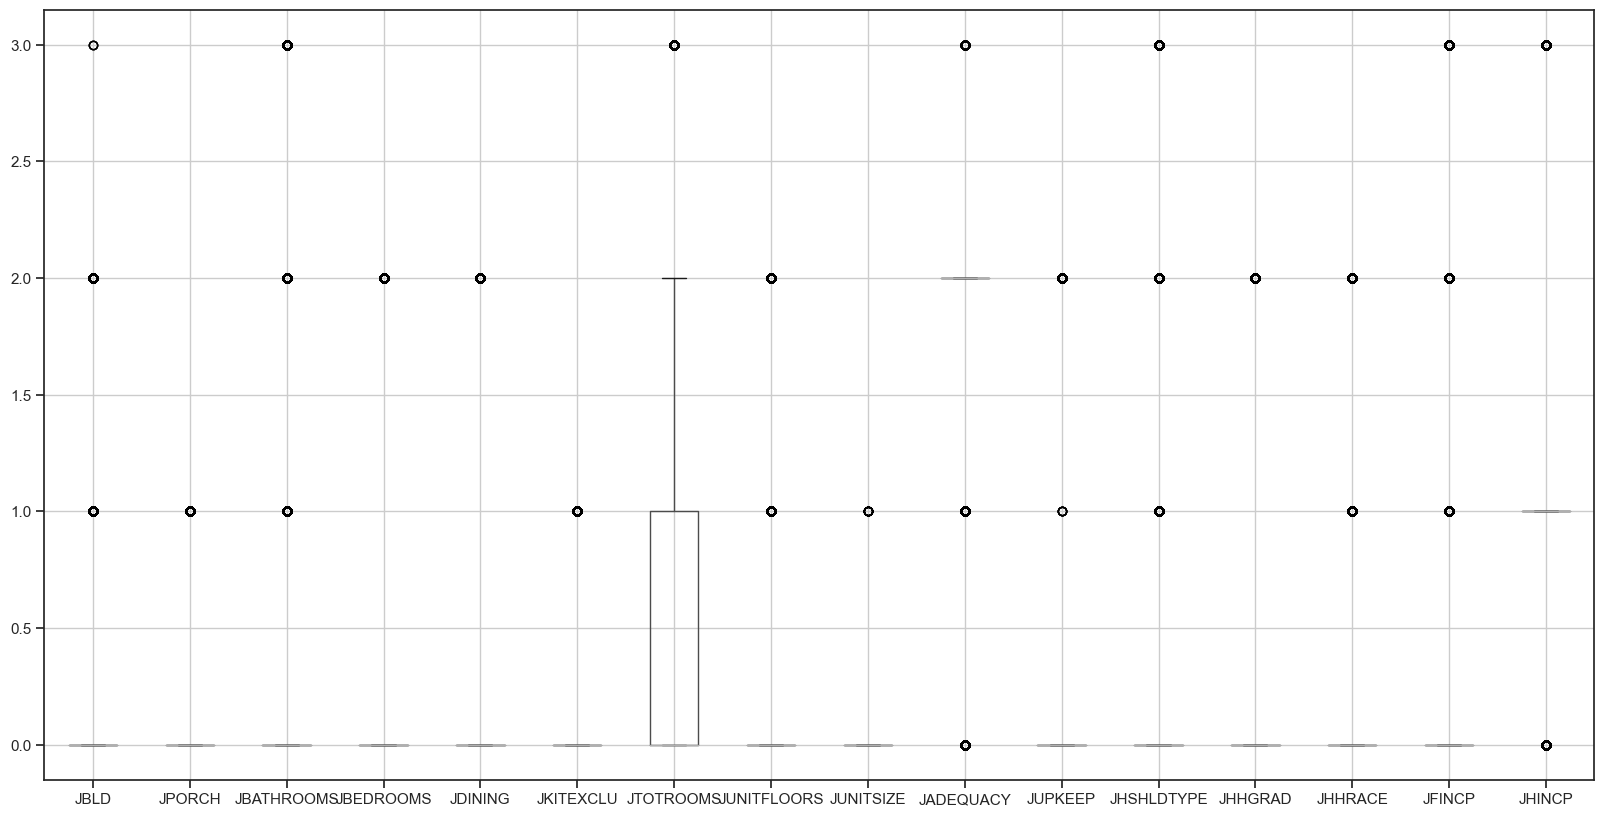

In [29]:
#2017
var17.boxplot(figsize=(20,10))
plt.show()

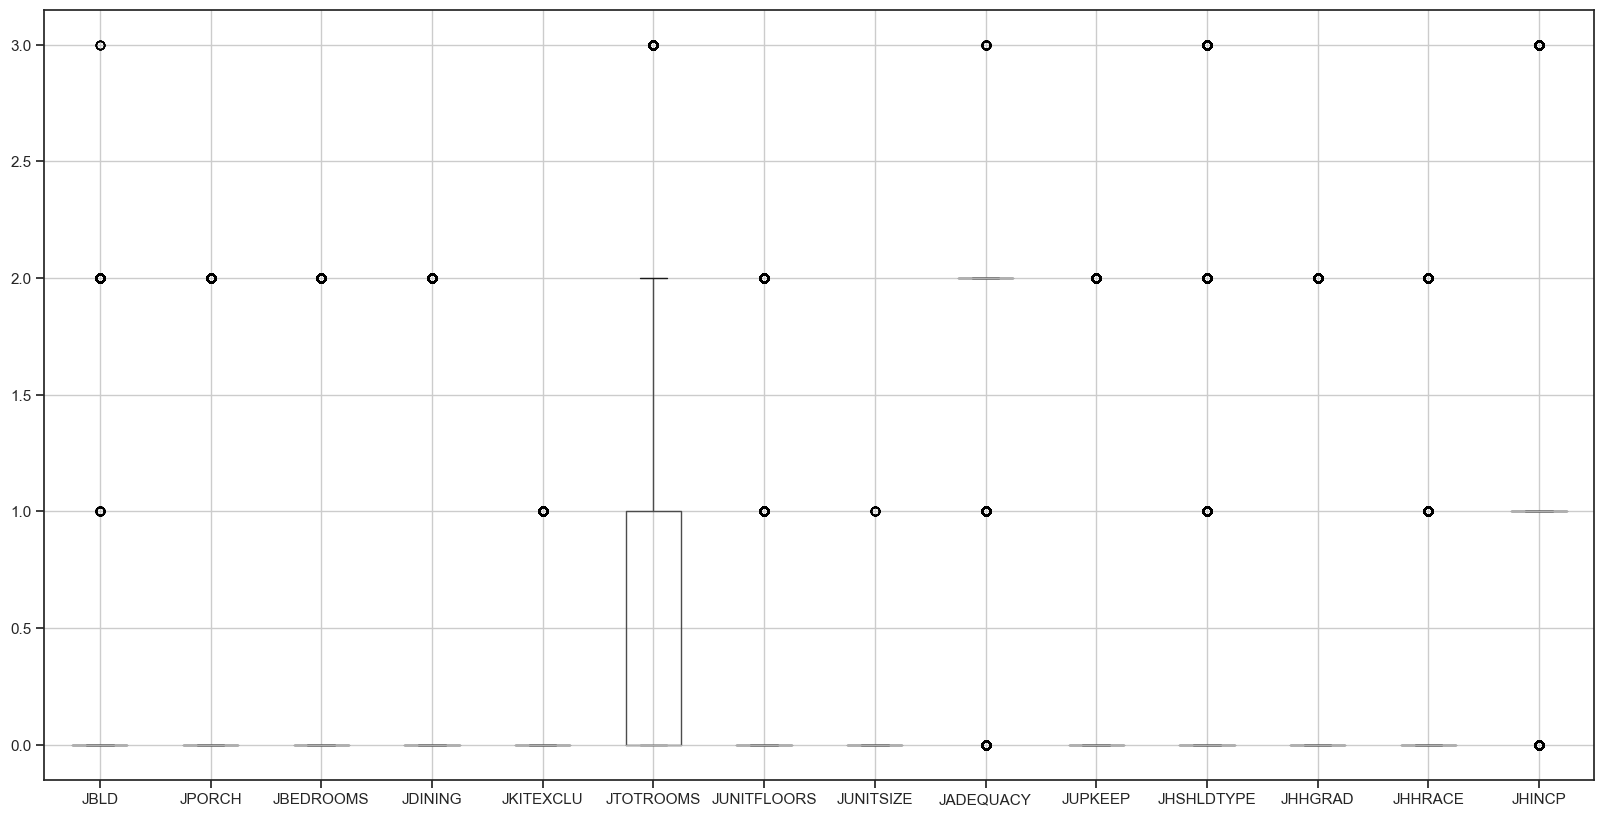

In [30]:
#2020
var20.boxplot(figsize=(20,10))
plt.show()

As we can observe from the boxplots, all our values range from 0 to 3, meaning that they are codified.

We will now look at the distributioon of our datasets.

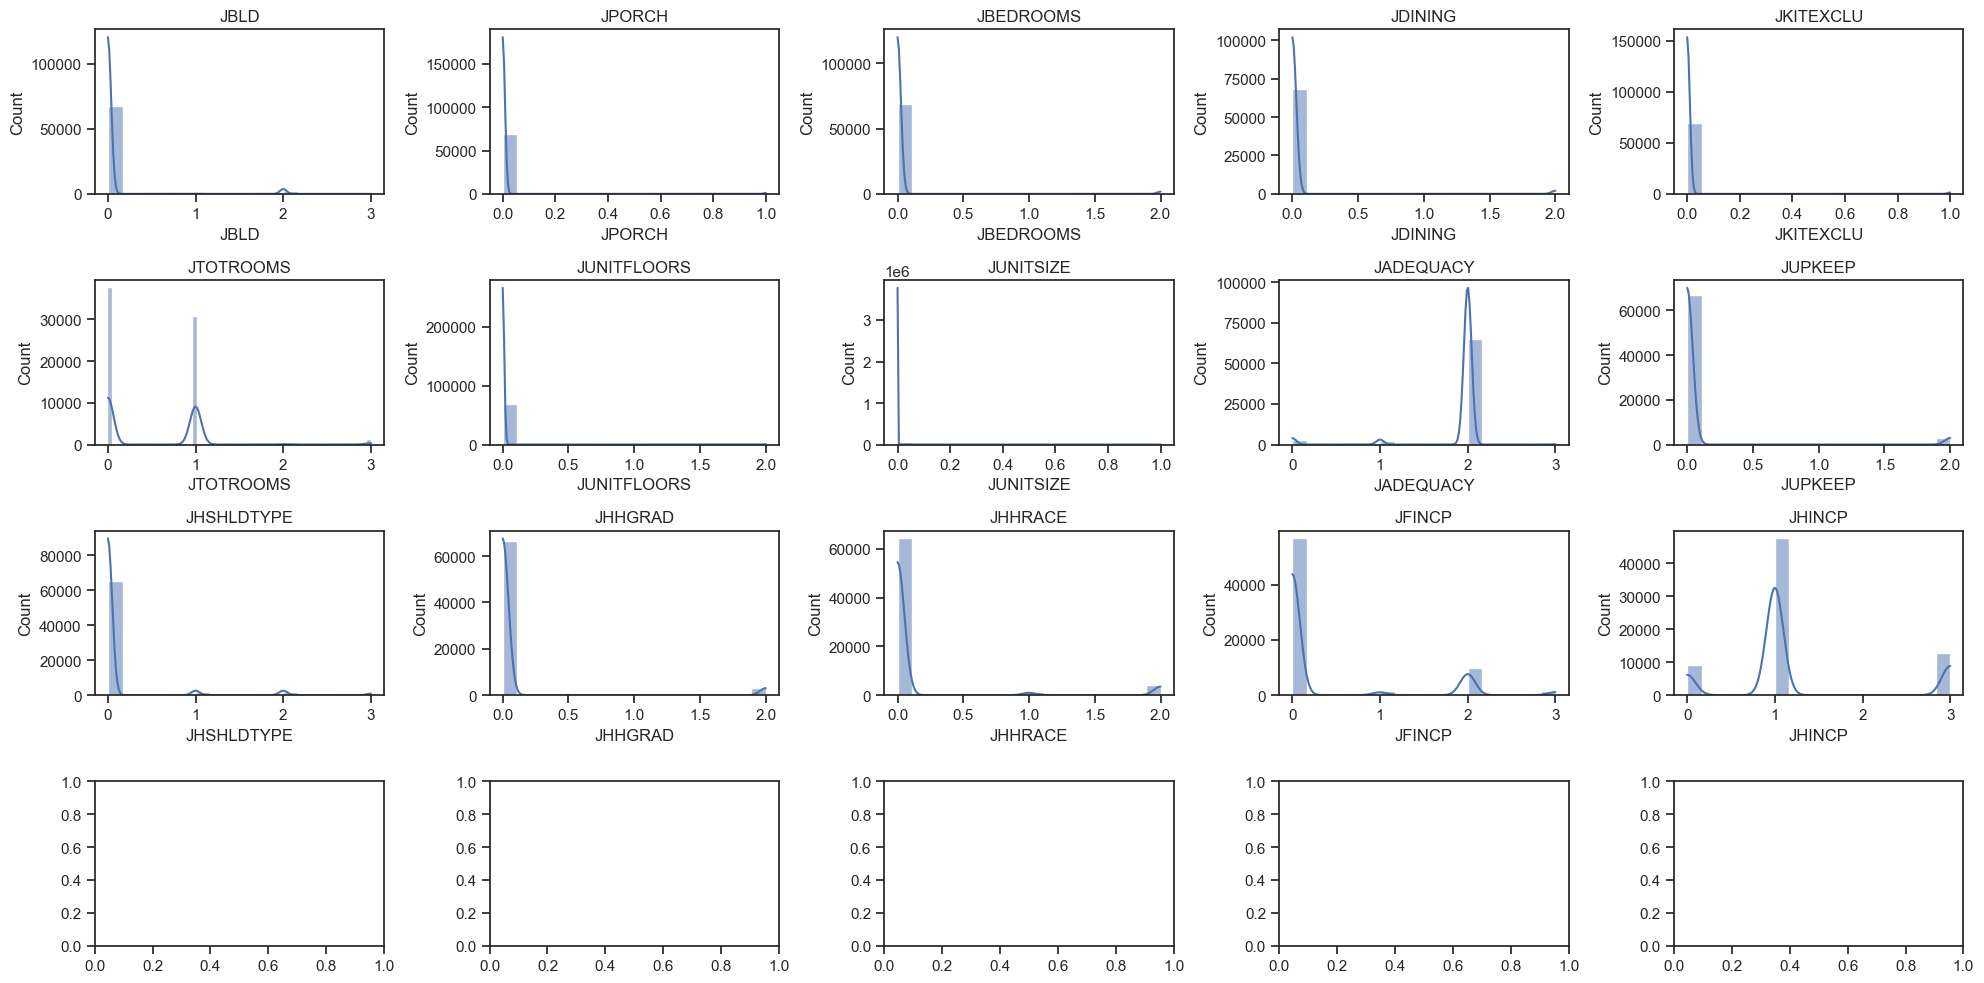

In [31]:
#2015
num_rows = 4
num_cols = 5
variable_names = list(var15.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=var15[var_name], ax=ax, kde=True)
    ax.set_title(var_name)

plt.tight_layout()
plt.show()

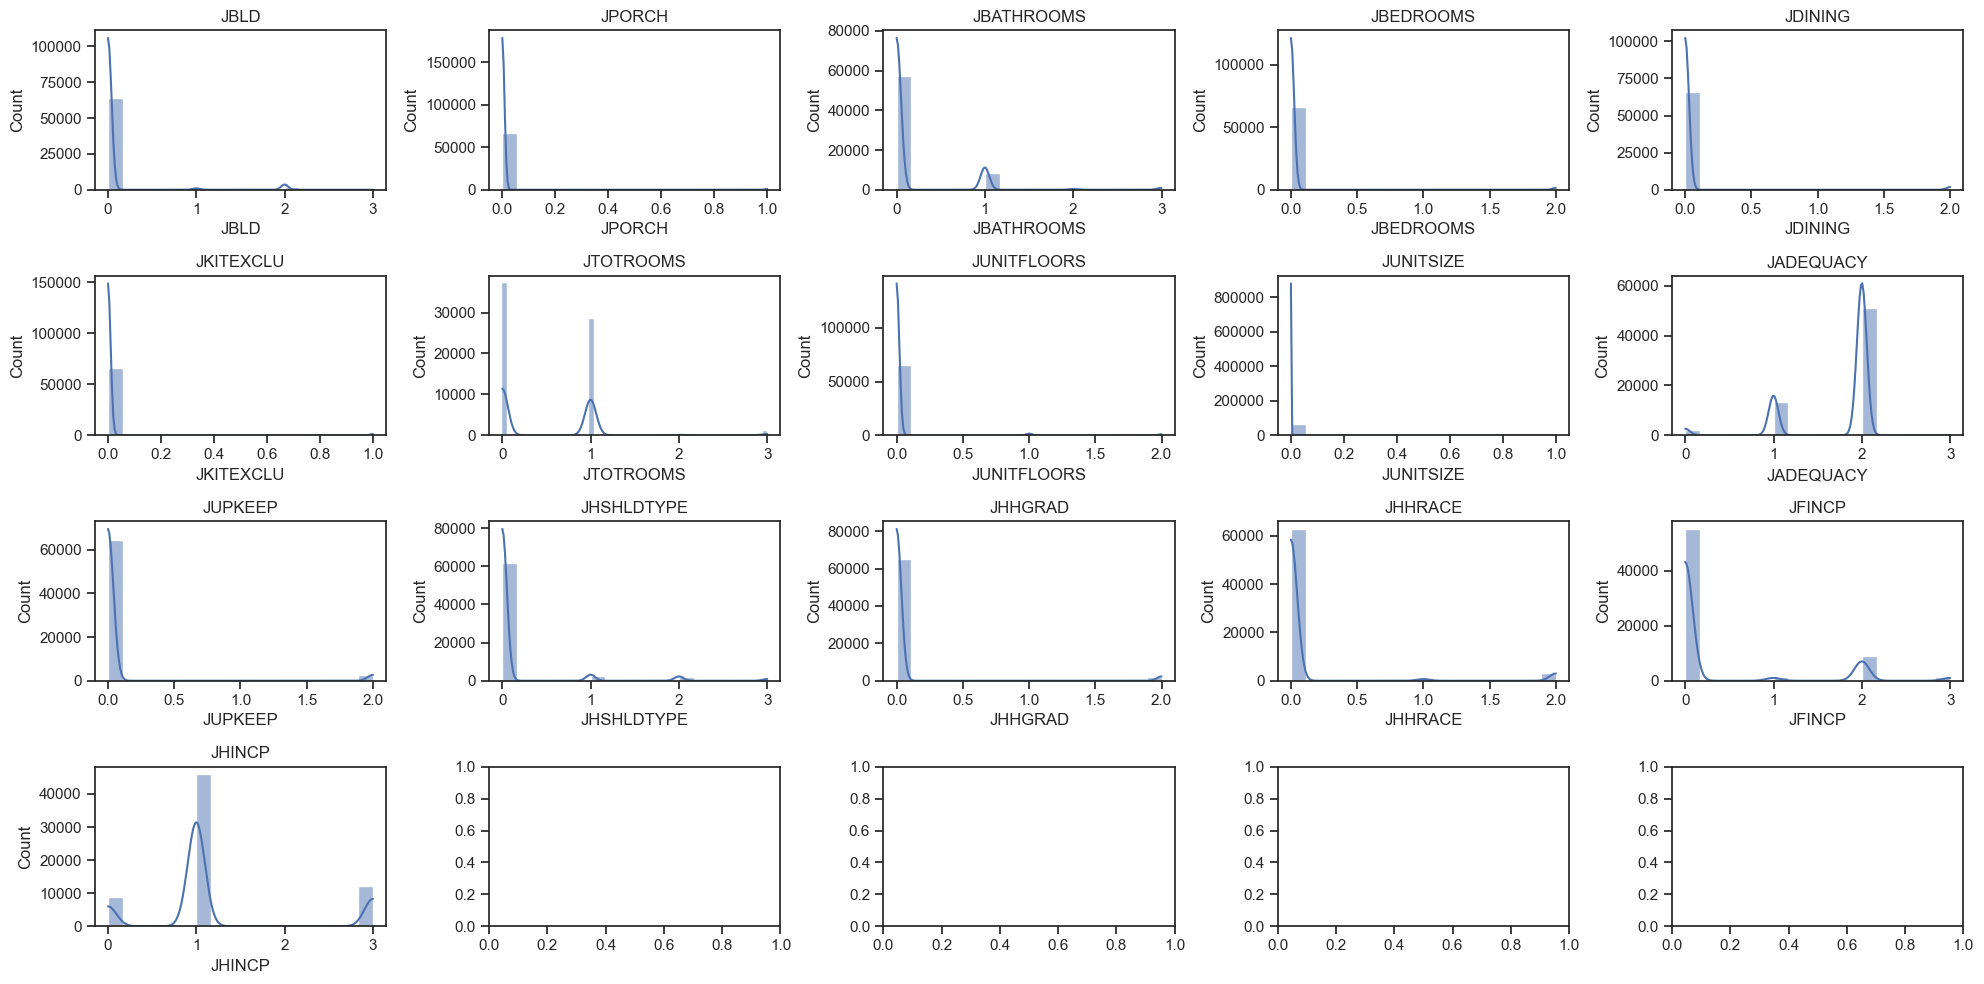

In [32]:
#2017
num_rows = 4
num_cols = 5
variable_names = list(var17.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=var17[var_name], ax=ax, kde=True)
    ax.set_title(var_name)

plt.tight_layout()
plt.show()

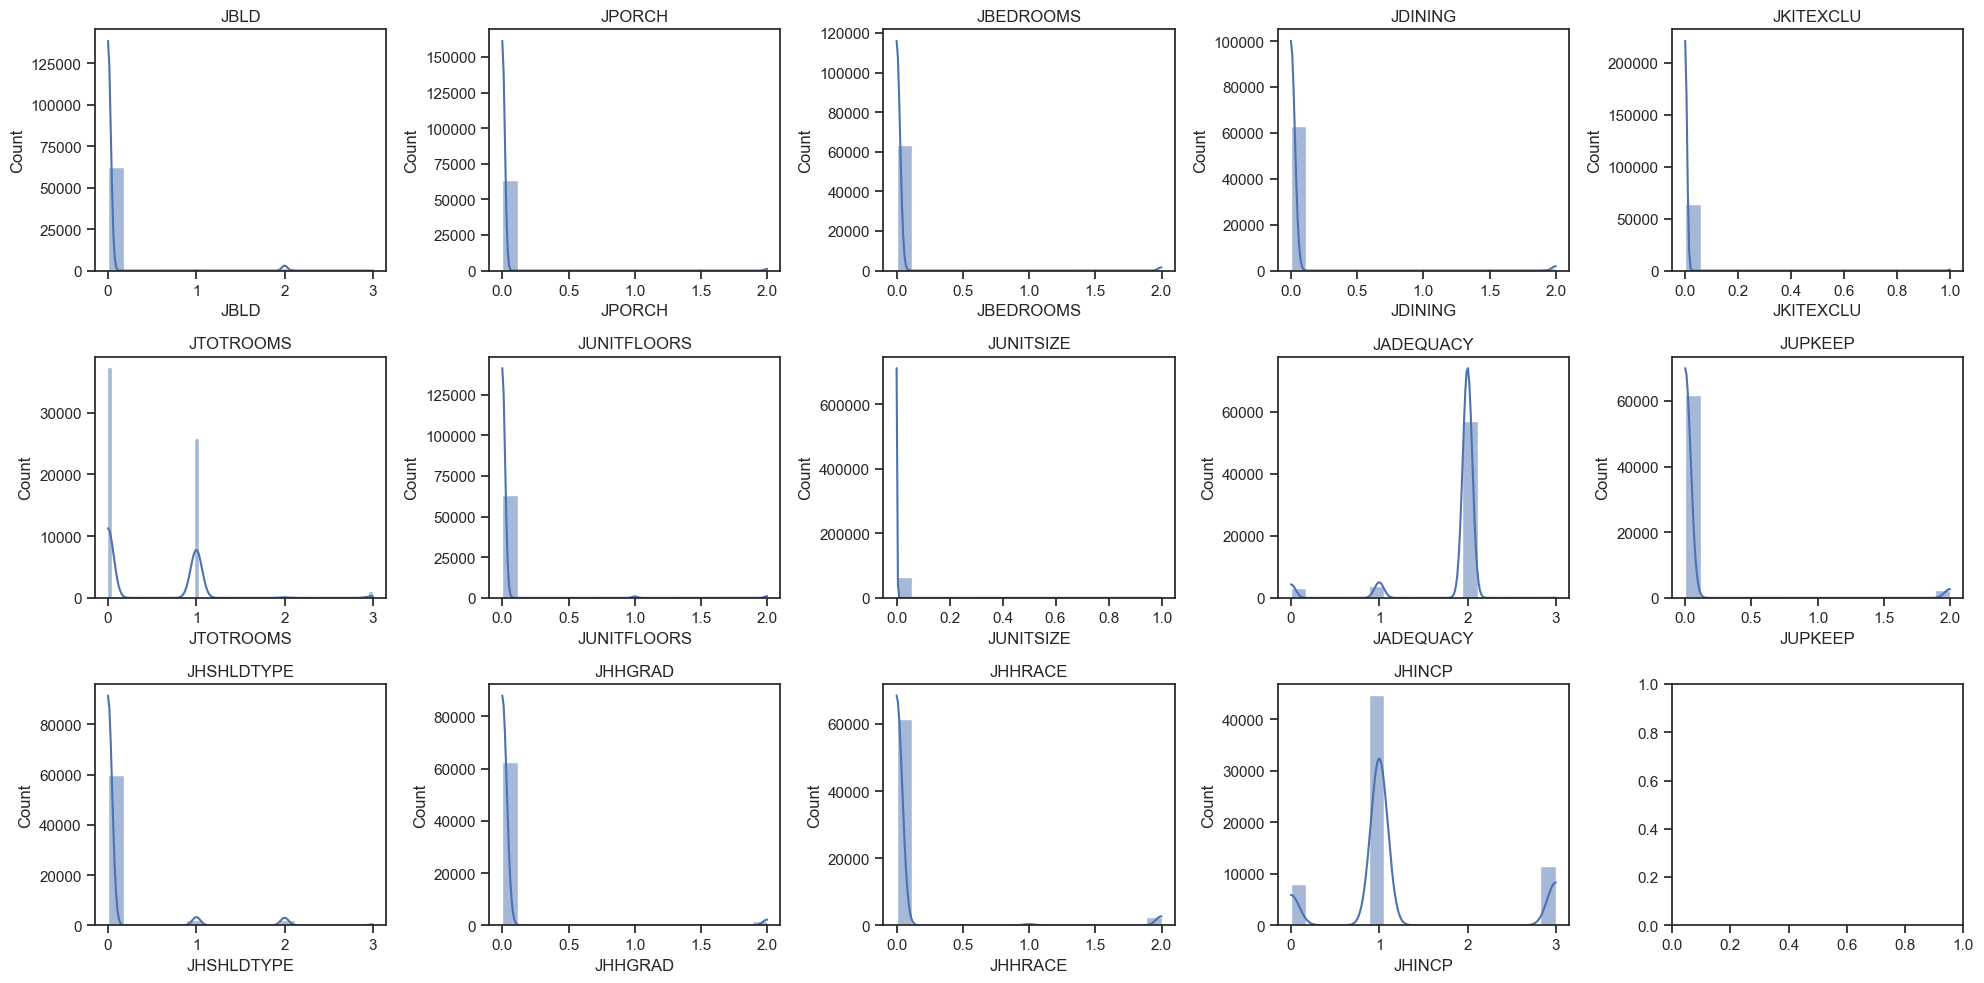

In [34]:
#2020
num_rows = 3
num_cols = 5
variable_names = list(var20.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=var20[var_name], ax=ax, kde=True)
    ax.set_title(var_name)

plt.tight_layout()
plt.show()

## 4.Preprocessing of data
Now in order to verify that variables are on the same scale, we will standardize the datasets. This is crucial for the clustering technique we will implement--> K-means.

And using the elbow method, which plots the inertia for different k-values and shows the "elbow point", we will see why using 3 clusters is optimal

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

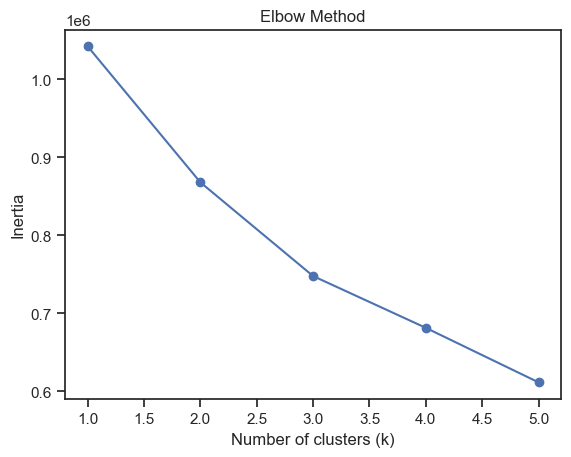

In [36]:
#2015
scaler = StandardScaler()
data_scaled_15 = scaler.fit_transform(var15)
inertia = []
k_values = list(range(1, 6))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_15)
    inertia.append(kmeans.inertia_)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

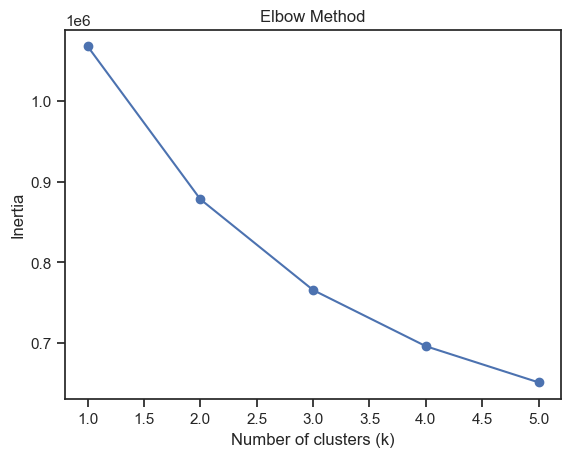

In [37]:
#2017
scaler = StandardScaler()
data_scaled_17 = scaler.fit_transform(var17)
inertia = []
k_values = list(range(1, 6))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_17)
    inertia.append(kmeans.inertia_)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

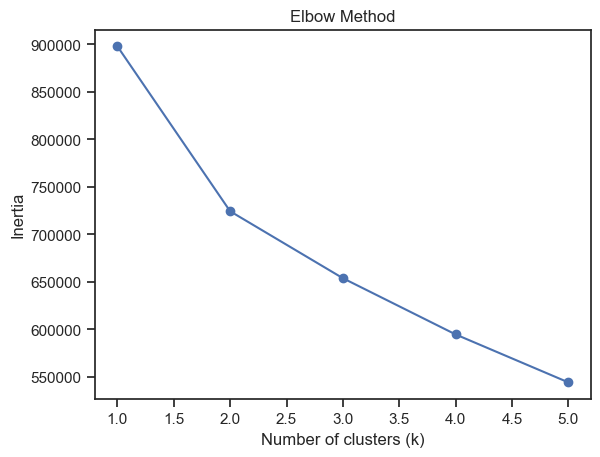

In [38]:
#2020
scaler = StandardScaler()
data_scaled_20 = scaler.fit_transform(var20)
inertia = []
k_values = list(range(1, 6))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_20)
    inertia.append(kmeans.inertia_)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Now we will separately perform the clustering and check the characteristics of the clusters for each year

We will perform 3 clusters using k-means and look at the count of each of these. Then, by looking at the mean of certain variables, we will establesh which cluster is 1:lower-class, 2:middle-class and 3:upper-class.

### 2015

In [39]:
k = 3 
kmeans = KMeans(init="random",n_clusters=k,n_init=10,max_iter=300, random_state=42)
kmeans_clusters_15 = kmeans.fit_predict(data_scaled_15)

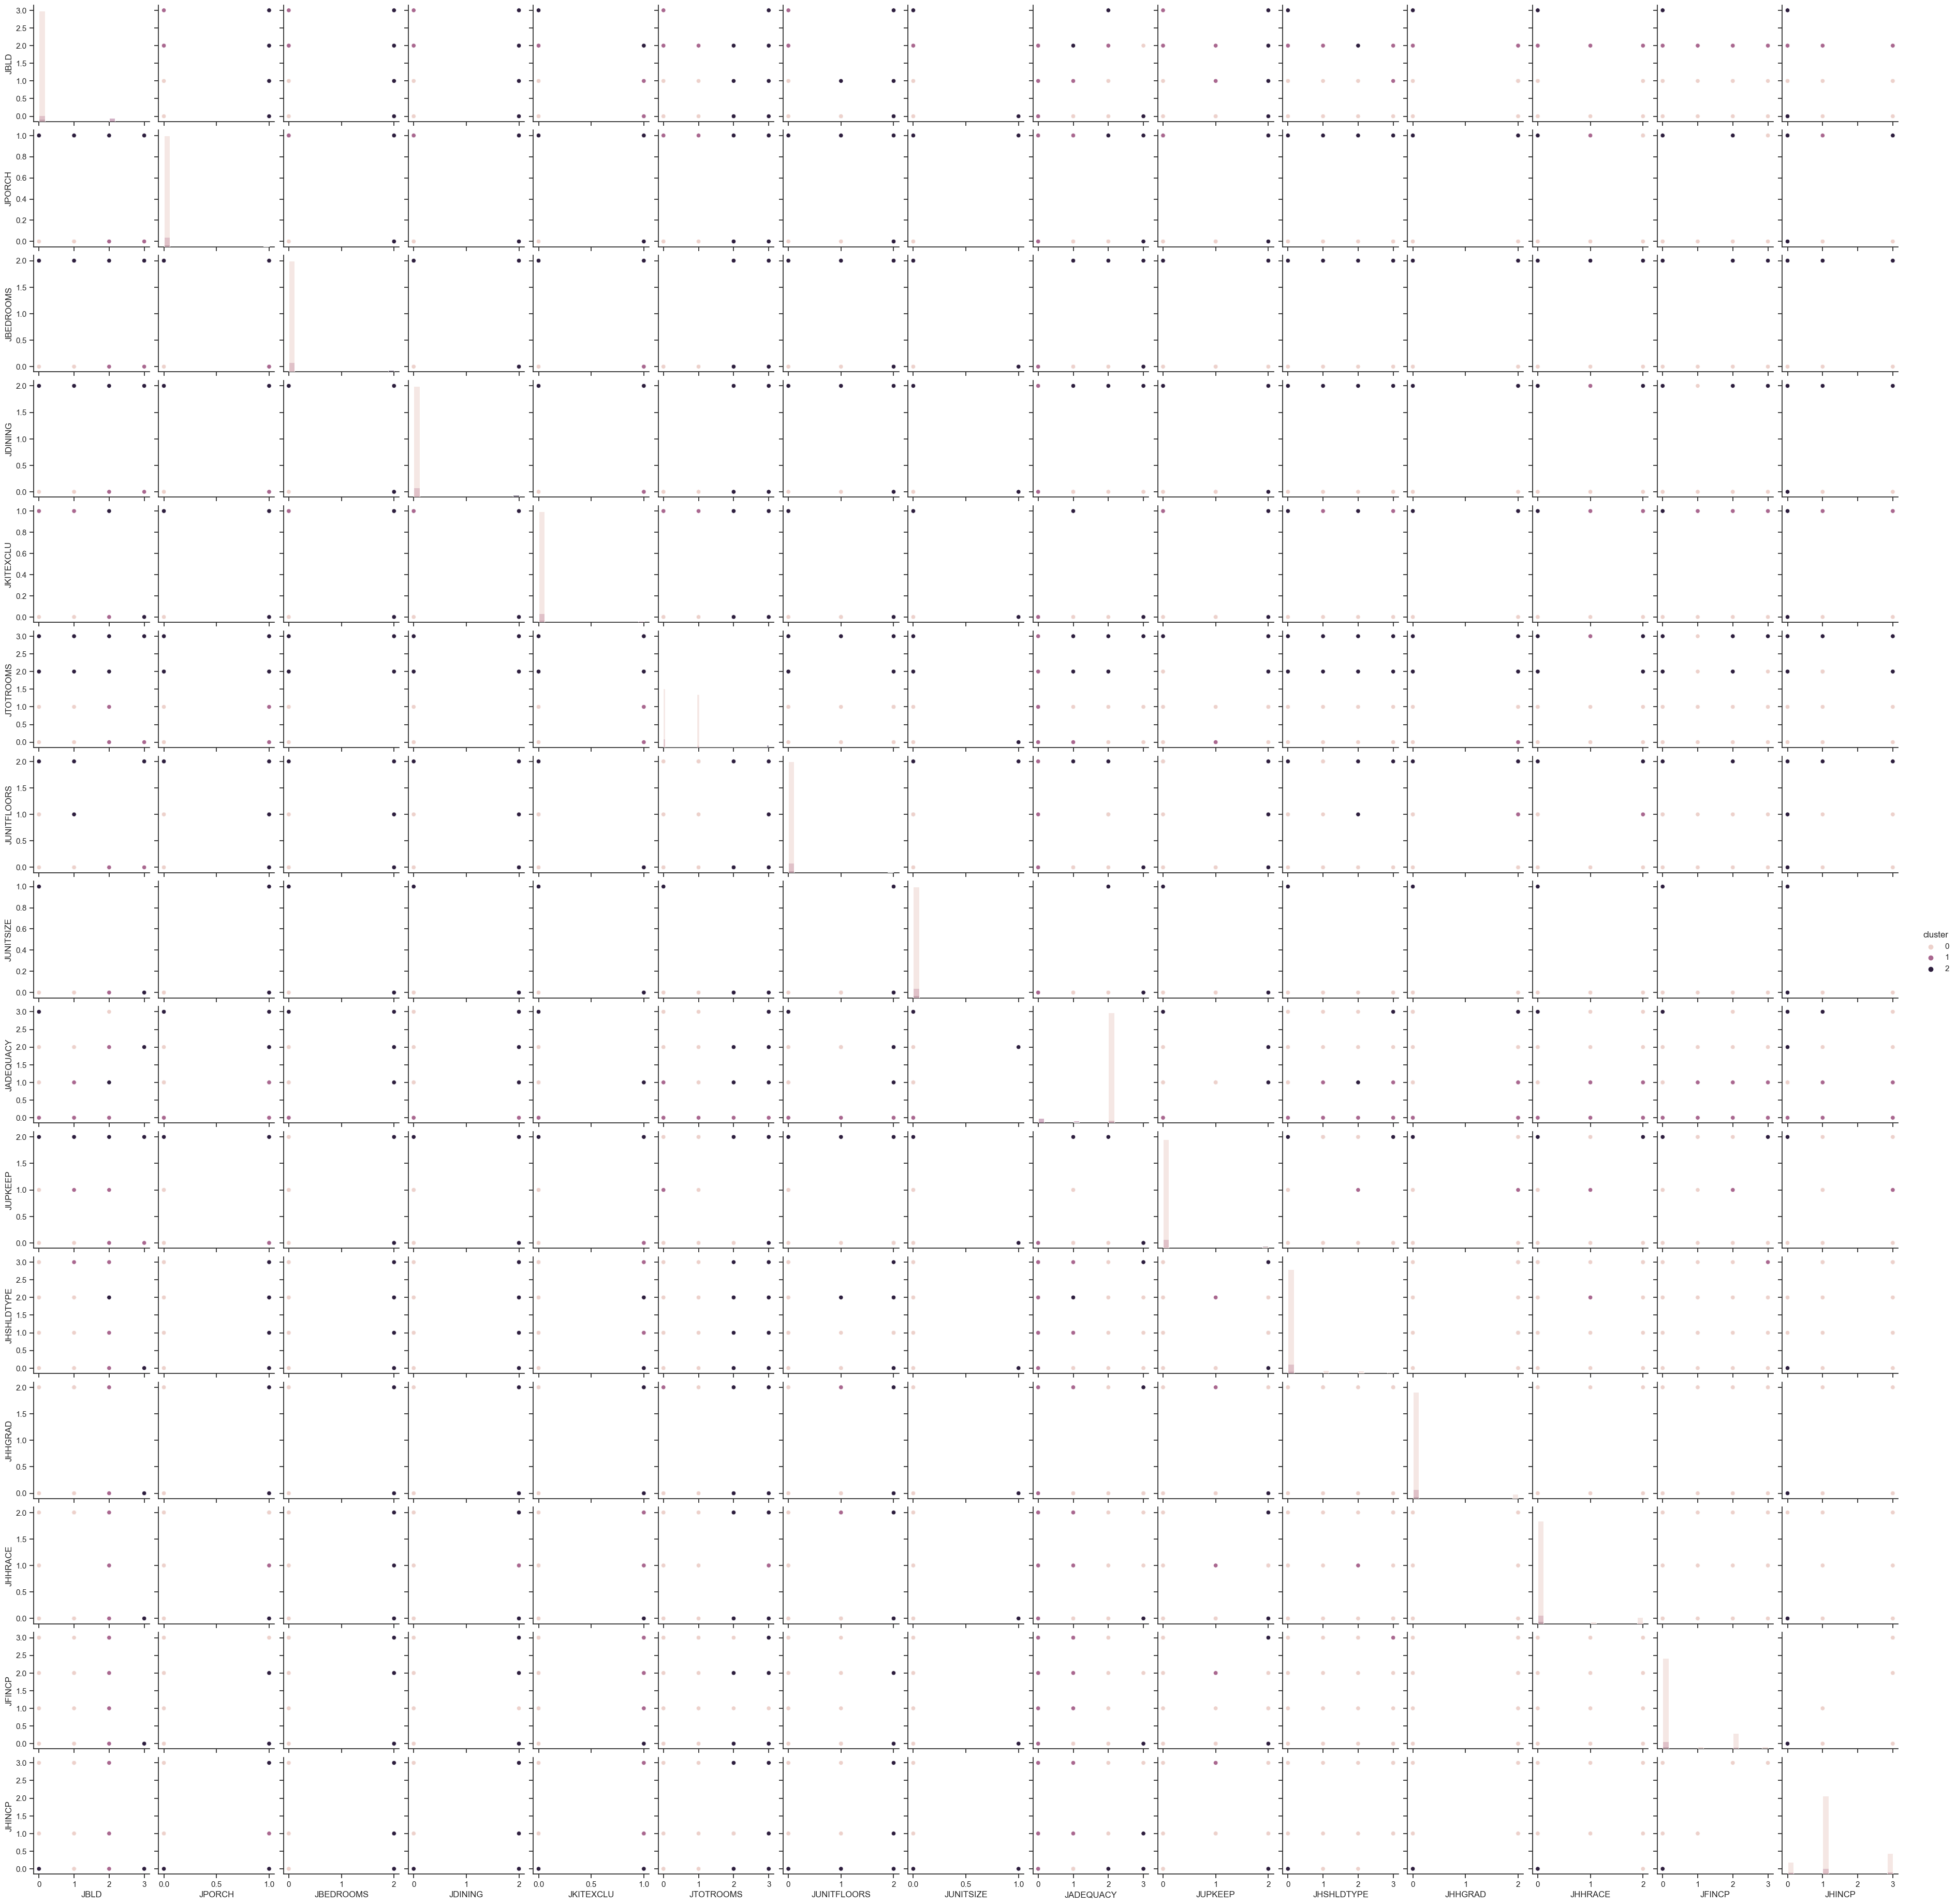

In [40]:
#Add the cluster labels to var15 and plot them against each variable
var15_clustered = var15.copy()
var15_clustered['cluster'] = kmeans_clusters_15
sns.pairplot(var15_clustered, hue='cluster', diag_kind='hist')
plt.show()

In [46]:
#Count of classes
var15_clustered['cluster'].value_counts()

0    62676
1     5443
2     1374
Name: cluster, dtype: int64

In [52]:
#determine what cluster represents each social class by checking the mean family income
mean_income = var15_clustered.groupby('cluster')['JHINCP'].mean()
print(mean_income)

cluster
0    1.261248
1    1.251699
2    0.305677
Name: JHINCP, dtype: float64


In [53]:
var15_clustered['cluster'] = var15_clustered['cluster'].replace({0:3, 1:2, 2:1})
var15_clustered['cluster'].value_counts()

3    62676
2     5443
1     1374
Name: cluster, dtype: int64

### 2017

In [41]:
kmeans_clusters_17 = kmeans.fit_predict(data_scaled_17)

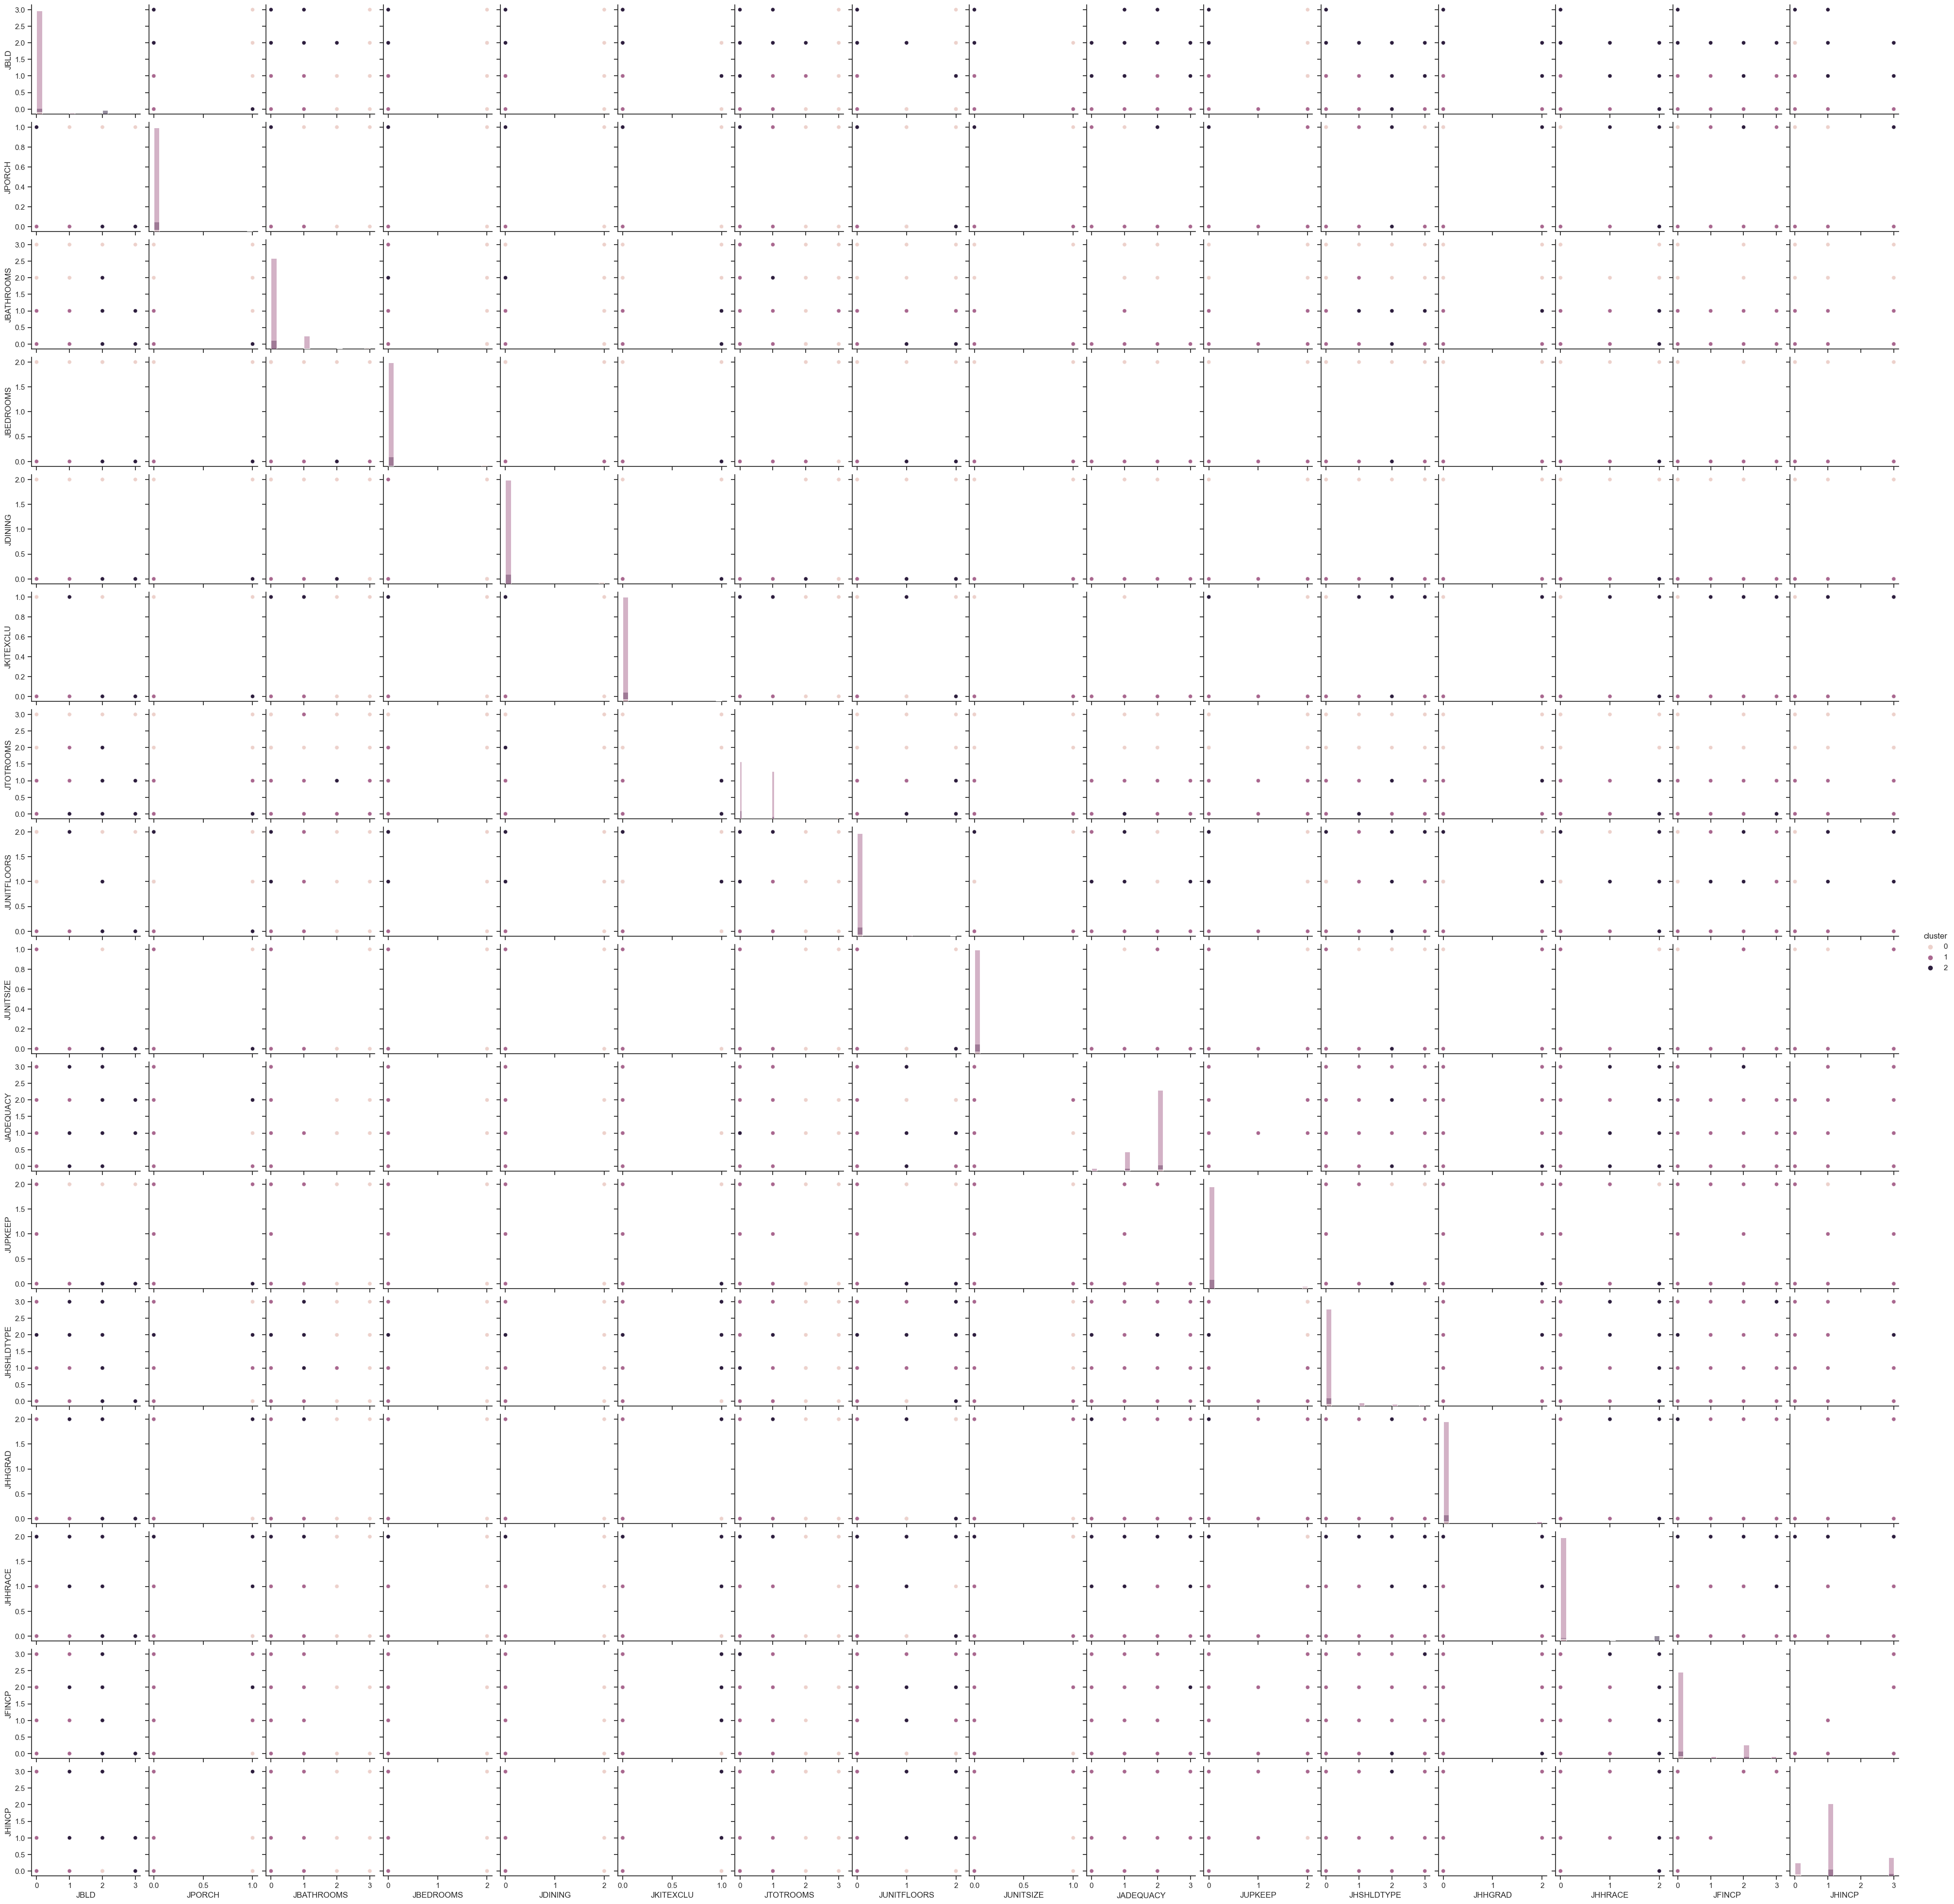

In [42]:
#Add the cluster labels to var17 and plot them against each variable
var17_clustered = var17.copy()
var17_clustered['cluster'] = kmeans_clusters_17
sns.pairplot(var17_clustered, hue='cluster', diag_kind='hist')
plt.show()

In [45]:
#Count of classes
var17_clustered['cluster'].value_counts()

1    59957
2     5654
0     1141
Name: cluster, dtype: int64

In [50]:
#determine what cluster represents each social class by checking the mean family income
mean_income = var17_clustered.groupby('cluster')['JHINCP'].mean()
print(mean_income)

cluster
0    0.283085
1    1.228230
2    1.443049
Name: JHINCP, dtype: float64


In [51]:
var17_clustered['cluster'] = var17_clustered['cluster'].replace({0:1, 1:2, 2:3})
var17_clustered['cluster'].value_counts()

2    59957
3     5654
1     1141
Name: cluster, dtype: int64

### 2020

In [43]:
kmeans_clusters_20 = kmeans.fit_predict(data_scaled_20)

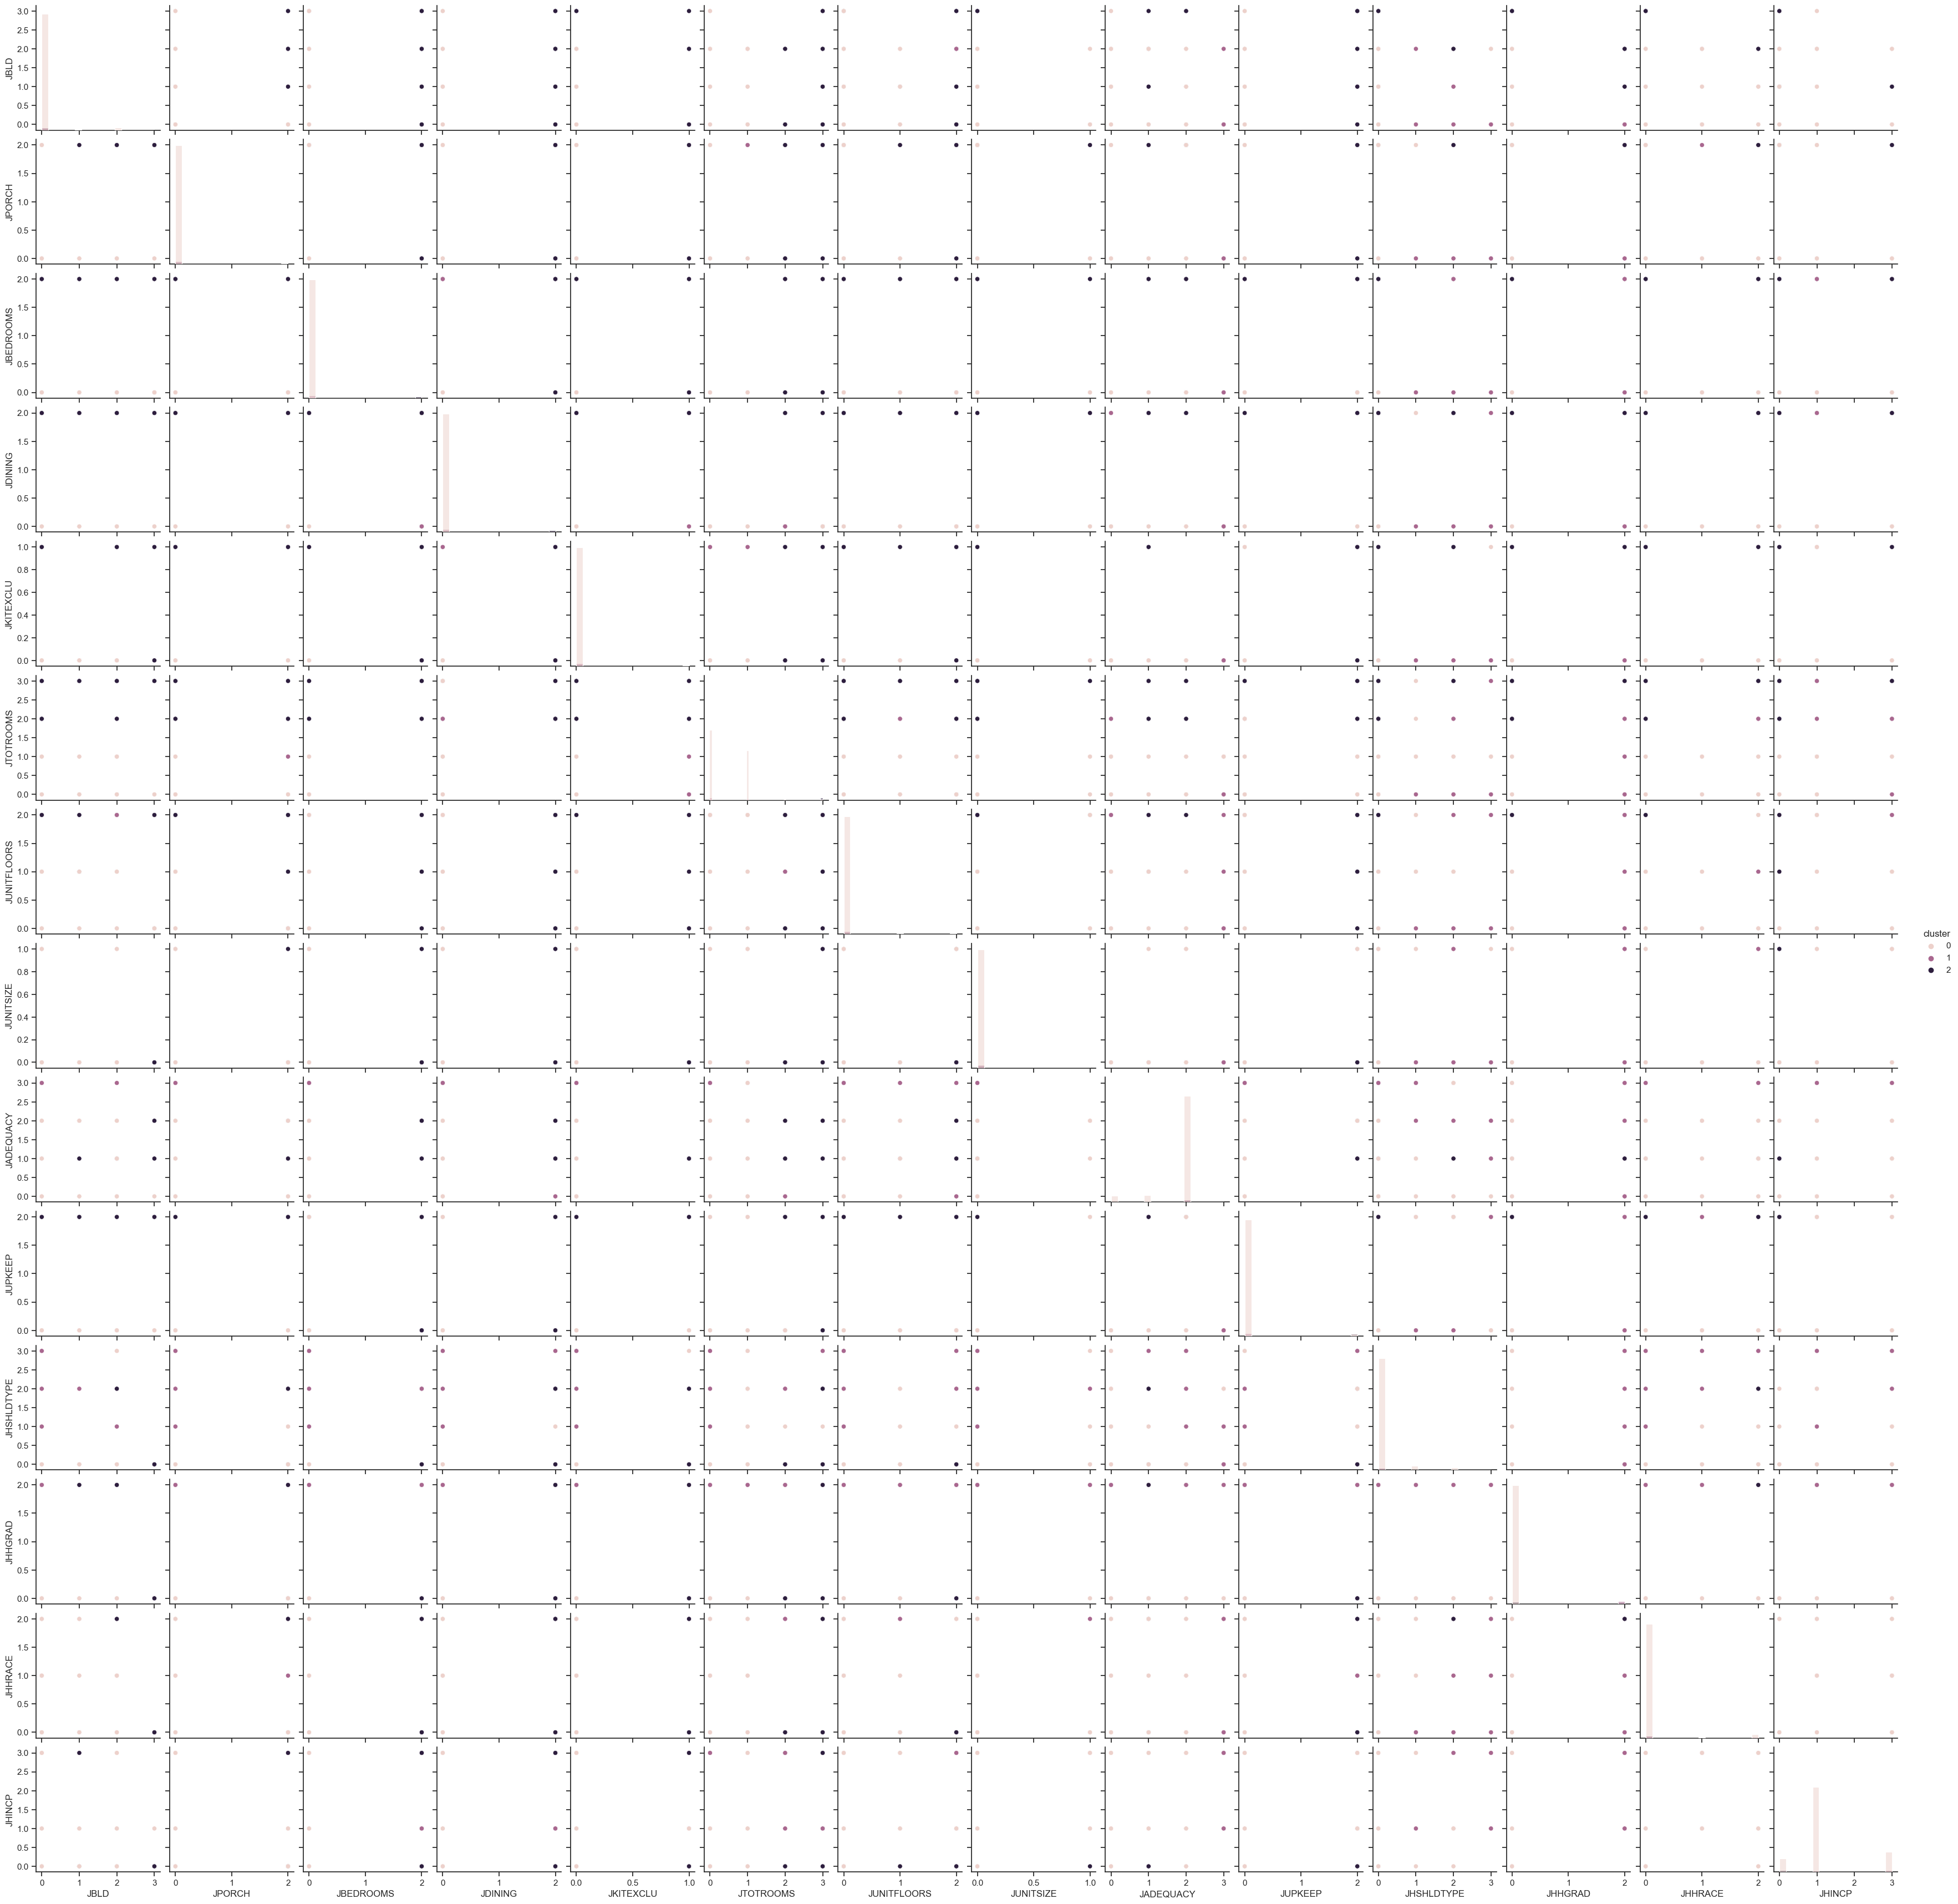

In [44]:
#Add the cluster labels to var20 and plot them against each variable
var20_clustered = var20.copy()
var20_clustered['cluster'] = kmeans_clusters_20
sns.pairplot(var20_clustered, hue='cluster', diag_kind='hist')
plt.show()

In [47]:
#Count of classes
var20_clustered['cluster'].value_counts()

0    61526
1     1503
2     1112
Name: cluster, dtype: int64

In [48]:
#determine what cluster represents each social class by checking the mean family income
mean_income = var20_clustered.groupby('cluster')['JHINCP'].mean()
print(mean_income)

cluster
0    1.227189
1    2.213573
2    0.089029
Name: JHINCP, dtype: float64


In [49]:
var20_clustered['cluster'] = var20_clustered['cluster'].replace({0:2, 1:3, 2:1})
var20_clustered['cluster'].value_counts()

2    61526
3     1503
1     1112
Name: cluster, dtype: int64

## 5. Save our results

In [55]:
usa = {
    "Year": [2015, 2017, 2020],
    "Lower_Class": [1374,1141 , 1112],
    "Middle_Class": [5443, 59957, 61526],
    "High_Class": [62676, 5654, 1503],
}

usa = pd.DataFrame(usa)
usa

,Year,Lower_Class,Middle_Class,High_Class
0,2015,1374,5443,62676
1,2017,1141,59957,5654
2,2020,1112,61526,1503


Export them to a csv file

In [56]:
usa.to_csv('/Users/mac/Desktop/TFG/data/code/classes/usa.csv', index=False)